In [4]:
using ITensors,ITensorMPS
using RandomMeas
using ProgressBars

In [22]:
N  = 6
χ = 2^(N÷2)
ξ = siteinds("Qubit", N)
ψ = random_mps(ξ; linkdims=χ);

In [23]:
p = zeros(N)
for NA in 1:N
    spec = get_spectrum(ψ,NA)
    p[NA] = get_moment(spec,2)[1]
end
println("purities ", p);

purities [0.5065023559010511, 0.3050737159707439, 0.25828197406298137, 0.28300652729231507, 0.5203041212604946, 1.0]


In [24]:
#Perform Randomized measurements
ITensors.disable_warn_order()
nu=100
NM=100
data = zeros(Int8,(nu,NM,N))
for r in ProgressBar(1:nu, printing_delay=2)
    u = get_rotations(ξ,1) #Haar rotations in A
    data[r,:,:] = get_RandomMeas(ψ,u,NM)
end

0.0%┣                                              ┫ 0/100 [00:00<00:00, -0s/it]
100.0%┣██████████████████████████████████████████┫ 100/100 [00:02<00:00, 62it/s]
100.0%┣██████████████████████████████████████████┫ 100/100 [00:02<00:00, 62it/s]


In [25]:
ps = zeros(N)
for NA in ProgressBar(1:N, printing_delay=2)
        ps[NA] = get_purity_hamming(data[:,:,1:NA],ξ[1:NA])
end
println("estimated purities ",ps);

estimated purities [0.5041939393939391, 0.30689696969696995, 0.2467575757575758, 0.26378787878787874, 0.5201636363636364, 0.9474484848484845]


0.0%┣                                                ┫ 0/6 [00:00<00:00, -0s/it]
100.0%┣██████████████████████████████████████████████┫ 6/6 [00:00<00:00, 60it/s]
100.0%┣██████████████████████████████████████████████┫ 6/6 [00:00<00:00, 60it/s]


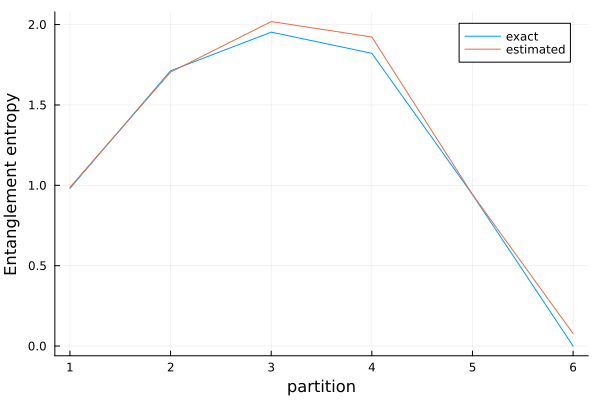

In [26]:
using Plots
Plots.plot(-log2.(p),label="exact")
Plots.plot!(-log2.(ps),label="estimated")
xlabel!("partition")
ylabel!("Entanglement entropy")
#legend()